# Convolutional Neural Network
pip install mnist

[Source: https://victorzhou.com/blog/keras-cnn-tutorial/ , https://victorzhou.com/blog/intro-to-cnns-part-1/ ]

MNIST is the following dataset:
    
    
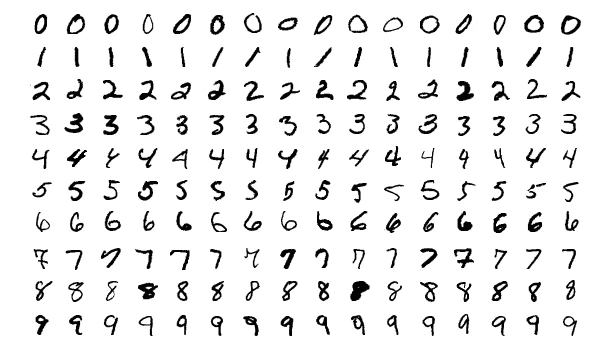

In [3]:
%%script C:\Users\marci\AppData\Local\Programs\Python\Python35\python.exe
import sys


#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

#from mnist import MNIST
#mndata = MNIST('C:\\Users\\marci\\MNIST_data')

import numpy as np
import mnist
import keras
import tensorflow
import tensorflow.keras as keras
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
#from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Separate the mnist data into training and test
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()


# DATA SEPARATION AND CLEANING

# Normalize the images. 
# normalize the image pixel values from [0, 255] to [-0.5, 0.5]
train_images = (train_images / 255) - 0.5 
test_images = (test_images / 255) - 0.5

# Reshape the images.
# We’ll also reshape each image from (28, 28) to (28, 28, 1) because Keras requires the third dimension
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)


# BUILDING THE MODEL
# Building the model
num_filters = 8 # number of different convolution filters
filter_size = 3 # each filter is 3 (w x h x l)
pool_size = 2 # 2x2 pooling

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(), # reduce dimesions by getting rid of shape
  Dense(10, activation='softmax')
])

#TRAINING THE MODEL
# Compile the model.
model.compile(
  'adam', #optimizer for gradient decent (how fast)
  loss='categorical_crossentropy', #loss function (difference between predicted and target)
  metrics=['accuracy'], #Function used to determine how accurate are the predictions
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3, # number of iterations of entire dataset
  validation_data=(test_images, to_categorical(test_labels)),
)

#FINAL RESULT
# Save the model to disk. These are the weights calculated from the training.
model.save_weights('cnn.h5')

# Confirm if the first 5 test images produce the correct test labels
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

# If the two arrays are the same, this means that the prediction is correct

Train on 60000 samples, validate on 10000 samples
Epoch 1/3

60000/60000 [==============================] - 7s 123us/sample - loss: 0.3648 - acc: 0.8941 - val_loss: 0.2353 - val_acc: 0.9298
Epoch 2/3

60000/60000 [==============================] - 7s 122us/sample - loss: 0.1975 - acc: 0.9433 - val_loss: 0.1561 - val_acc: 0.9539
Epoch 3/3

60000/60000 [==============================] - 7s 122us/sample - loss: 0.1396 - acc: 0.9596 - val_loss: 0.1264 - val_acc: 0.9630
[7 2 1 0 4]
[7 2 1 0 4]


2021-02-13 13:57:09.266235: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2021-02-13 13:57:09.266264: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2021-02-13 13:57:12.375004: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library nvcuda.dll
2021-02-13 13:57:12.396470: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: GeForce GTX 1080 major: 6 minor: 1 memoryClockRate(GHz): 1.8475
pciBusID: 0000:01:00.0
2021-02-13 13:57:12.397031: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2021-02-13 13:57:12.397521: